# Алешко Альберт АС-21-05 Вариант 1
# Лабораторная работа №4
# Регрессионный анализ 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import chain
from scipy.stats import spearmanr, f

plt.style.use('Solarize_Light2') # Функция для задания стиля графикам


По данным предыдущей работы провести регрессионный анализ:

выбрать вид регрессионной зависимости (возможно преобразование данных для выбора линейной модели); 

определить модельные коэффициенты;

проверить модель на значимость;

провести проверку модели на адекватность (см. дополнительные данные на отдельной вкладке).


In [3]:
names = [f'var{i + 1}' for i in range(5)]

df_train = pd.read_excel('data2.xlsx', sheet_name='2-1',
                   header=None, names=names)
df_train.head(6)

,var1,var2,var3,var4,var5
0,13.576533,8.444634,42.737,7.574,2.369
1,9.988142,13.552947,23.261,1.660,6.072
2,8.190783,14.466266,13.439,-5.422,3.504
3,8.412009,10.531638,15.174,-5.483,4.532
4,10.021344,8.826599,24.573,3.247,7.447
5,6.843471,7.619135,13.896,-5.045,7.473


In [4]:
df_test = pd.read_excel('data2.xlsx', sheet_name='1вар-адекв',
                   header=None, names=names)
df_test.head(6)

,var1,var2,var3,var4,var5
0,8,10.746,19.059,-1.541,6.924
1,8,10.220,16.557,-4.043,5.923
2,8,8.615,18.565,-2.035,6.726
3,8,4.791,18.115,-2.485,6.546
4,8,2.831,19.900,-0.700,7.260
5,9,5.483,21.785,-1.115,5.225


In [5]:
independent_var = 'var1'

y_train = df_train[[var for var in df_train.columns if var != independent_var]]
x_train = df_train[independent_var]
y_test = df_test[y_train.columns]
x_test = df_test[independent_var]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50,), (50, 4), (35,), (35, 4))

In [6]:
def plot_data(x, y):
    fig, axs = plt.subplots(y.shape[1]//2, y.shape[1]//2, figsize=(10, 10))

    axs = list(chain.from_iterable(axs))

    for name, ax in zip(y_train.columns, axs):
        res = spearmanr(x, y[name])
        sns.regplot(x=x, y=y[name], ax=ax)
        ax.set_ylabel(name)
        ax.set_xlabel(independent_var)
        ax.text(x.min(), y[name].max(), 
                f'corr: {res[0]:.2f}, p-val: {res[1]:.2f}')

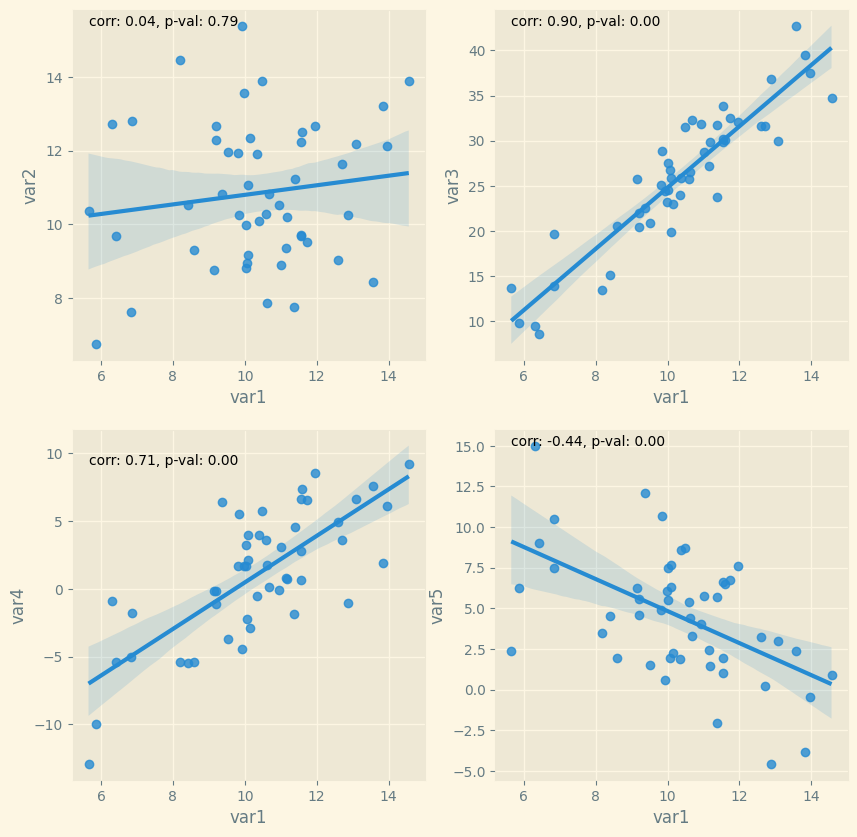

In [7]:
plot_data(x_train, y_train)

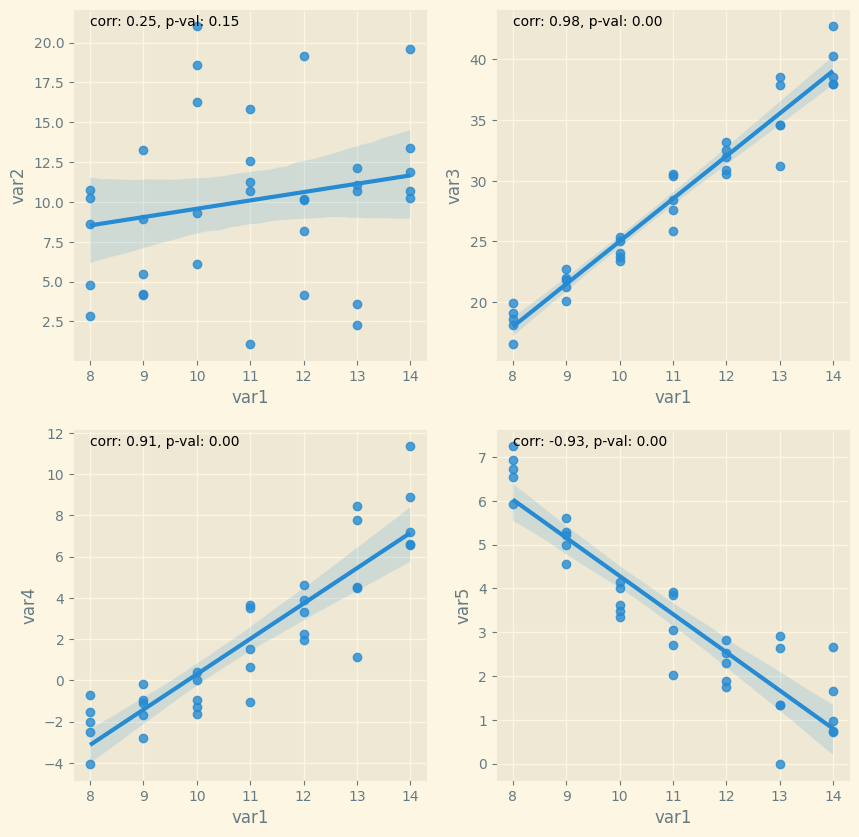

In [8]:
plot_data(x_test, y_test)

var1 - var2 - независимые

var1 - var3 - линейная зависимость

var1 - var4 - экспоненциальная зависимость (предположительно)

var1 - var5 - обратная экспоненциальная зависимость (предположительно)


С целью преобразования экспоненциальная зависимости в линейную, выполним преобразование: $x' = log(1 + x - min)$

где min = min(x),
max = max(x)

In [14]:
print(y_test['var5'])
# var4_min = y_train['var4'].min()
var5_min = y_train['var5'].min()
# y_train.loc[:, 'var4'] = np.power(y_train['var4'] - var4_min, 0.95).values
y_train.loc[:, 'var5'] = np.log(1 + np.exp(y_train['var5']) - np.exp(y_train['var5']).min()).values
# y_test.loc[:, 'var4'] = np.power(y_test['var4'] - y_test['var4'].min(), 0.95).values
y_test.loc[:, 'var5'] = np.log(1 + np.exp(y_test['var5'] - y_test['var5'].min()) - np.exp(y_test['var5'] - y_test['var5'].min()).min())

print(y_test['var5'])

0     6.930
1     5.929
2     6.732
3     6.552
4     7.266
5     5.231
6     5.294
7     4.554
8     4.997
9     5.614
10    3.347
11    4.159
12    3.486
13    4.022
14    3.619
15    2.720
16    3.059
17    2.034
18    3.921
19    3.854
20    1.761
21    1.886
22    2.830
23    2.310
24    2.541
25    1.332
26    2.654
27    0.000
28    2.924
29    1.346
30    0.734
31    2.663
32    0.752
33    1.658
34    0.982
Name: var5, dtype: float64
0     6.930
1     5.929
2     6.732
3     6.552
4     7.266
5     5.231
6     5.294
7     4.554
8     4.997
9     5.614
10    3.347
11    4.159
12    3.486
13    4.022
14    3.619
15    2.720
16    3.059
17    2.034
18    3.921
19    3.854
20    1.761
21    1.886
22    2.830
23    2.310
24    2.541
25    1.332
26    2.654
27    0.000
28    2.924
29    1.346
30    0.734
31    2.663
32    0.752
33    1.658
34    0.982
Name: var5, dtype: float64


В итоге, после проведённых испытаний, получилось следующее

первые 2 прогноза остались

var1 - var4 - линейная зависимость

var1 - var5 - сложная зависимость


С целью преобразования зависимости в линейную, я выполнил преобразование: $x' = log(1 + e^{(x - min)} - min_e)$

где $min = min(x)$,<br>
$min_e = min(exp(x))$.

In [ ]:
plot_data(x_train, y_train)

In [ ]:
plot_data(x_test, y_test)

In [ ]:
def get_means(x_test, y_test):
    means = dict()
    for x in x_test.unique():
        means[x] = np.mean(y_test[x_test == x])
    
    def f(x):
        nonlocal means, x_test
        return means[x], (x_test == x).sum()
    return f

In [ ]:
def is_adequately(linear_model, x_test, y_test):
    n = 30
    m = 6
    f_means = get_means(x_test, y_test)
    x_test_unique = x_test.unique()
    preds = linear_model.predict(pd.Series(x_test_unique, name='var1'))
    Q2 = 0
    for x, pred in zip(x_test_unique, preds):
        mean, n_i = f_means(x)
        Q2 += n_i * (mean - pred) ** 2

    Q3 = 0
    mean = y_test_part.mean()
    for y in y_test_part:
        Q3 += (mean - y) ** 2

    t = Q2 * (n - m) / (Q3 * (m - 2))
    tcr = f.ppf(0.95, m-2, n-m)
    
    print(f'{t = :.2f}, {tcr = :.2f}')

    return t < tcr

In [ ]:
target_var = 'var2'
y_test_part = y_test[target_var]

model_linear_ols = smf.ols(formula=f'{target_var} ~ var1', data=df_train)
linear_model = model_linear_ols.fit()
linear_model.summary()

In [ ]:
is_adequately(linear_model, x_test, y_test_part)

In [ ]:
target_var = 'var3'
y_test_part = y_test[target_var]

model_linear_ols = smf.ols(formula=f'{target_var} ~ var1', data=df_train)
linear_model = model_linear_ols.fit()
linear_model.summary()

In [ ]:
is_adequately(linear_model, x_test, y_test_part)

In [ ]:
target_var = 'var4'
y_test_part = y_test[target_var]

model_linear_ols = smf.ols(formula=f'{target_var} ~ var1', data=df_train)
linear_model = model_linear_ols.fit()
linear_model.summary()

In [ ]:
is_adequately(linear_model, x_test, y_test_part)

In [ ]:
target_var = 'var5'
y_test_part = y_test[target_var]

model_linear_ols = smf.ols(formula=f'{target_var} ~ var1', data=df_train)
linear_model = model_linear_ols.fit()
linear_model.summary()

In [ ]:
is_adequately(linear_model, x_test, y_test_part)